In [1]:
import pandas as pd
import numpy as np
from PIL import Image
from os.path import join as ospj
from os.path import exists as osex
import glob
import torch

In [2]:
df_train_labels=pd.read_csv(r'C:\GitHub\Smart-Education-data\data\DAiSEE\Sorted\sorted_labels_train.csv', index_col=0)
df_test_labels=pd.read_csv(r'C:\GitHub\Smart-Education-data\data\DAiSEE\Sorted\sorted_labels_test.csv', index_col=0)
df_train_labels[:3], df_test_labels[:3]

(           ClipID  Boredom  Engagement  Confusion  Frustration      f_name  \
 0  1100011002.avi        0           2          0            0  1100011002   
 1  1100011003.avi        0           2          0            0  1100011003   
 2  1100011004.avi        0           3          0            0  1100011004   
 
                                                 path  
 0  C:\GitHub\Smart-Education-data\data\DAiSEE\Sor...  
 1  C:\GitHub\Smart-Education-data\data\DAiSEE\Sor...  
 2  C:\GitHub\Smart-Education-data\data\DAiSEE\Sor...  ,
            ClipID  Boredom  Engagement  Confusion  Frustration      f_name  \
 0  5000441001.avi        1           2          0            0  5000441001   
 1  5000441002.avi        0           2          0            0  5000441002   
 2  5000441003.avi        1           2          0            0  5000441003   
 
                                                 path  
 0  C:\GitHub\Smart-Education-data\data\DAiSEE\Sor...  
 1  C:\GitHub\Smart-Educati

building column names in dataloader...

In [3]:
columns=['frame',
                  'face_id',
                  'timestamp',
                  'confidence',
                  'success',
                  'gaze_0_x', 'gaze_0_y', 'gaze_0_z',
                  'gaze_1_x', 'gaze_1_y', 'gaze_1_z',
                  'gaze_angle_x', 'gaze_angle_y', 
                  'eye_lmk_x_0', 'eye_lmk_x_1', 'eye_lmk_x_2', 'eye_lmk_x_3', 'eye_lmk_x_4',
                  'eye_lmk_x_5', 'eye_lmk_x_6', 'eye_lmk_x_7', 'eye_lmk_x_8', 'eye_lmk_x_9',
                  'eye_lmk_x_10', 'eye_lmk_x_11', 'eye_lmk_x_12', 'eye_lmk_x_13', 'eye_lmk_x_14',
                  'eye_lmk_x_15', 'eye_lmk_x_16', 'eye_lmk_x_17', 'eye_lmk_x_18', 'eye_lmk_x_19',
                  'eye_lmk_x_20', 'eye_lmk_x_21', 'eye_lmk_x_22', 'eye_lmk_x_23', 'eye_lmk_x_24',
                  'eye_lmk_x_25', 'eye_lmk_x_26', 'eye_lmk_x_27', 'eye_lmk_x_28', 'eye_lmk_x_29',
                  'eye_lmk_x_30', 'eye_lmk_x_31', 'eye_lmk_x_32', 'eye_lmk_x_33', 'eye_lmk_x_34',
                  'eye_lmk_x_35', 'eye_lmk_x_36', 'eye_lmk_x_37', 'eye_lmk_x_38', 'eye_lmk_x_39',
                  'eye_lmk_x_40', 'eye_lmk_x_41', 'eye_lmk_x_42', 'eye_lmk_x_43', 'eye_lmk_x_44',
                  'eye_lmk_x_45', 'eye_lmk_x_46', 'eye_lmk_x_47', 'eye_lmk_x_48', 'eye_lmk_x_49',
                  'eye_lmk_x_50', 'eye_lmk_x_51', 'eye_lmk_x_52', 'eye_lmk_x_53', 'eye_lmk_x_54',
                  'eye_lmk_x_55',
                  'eye_lmk_y_0', 'eye_lmk_y_1', 'eye_lmk_y_2', 'eye_lmk_y_3', 'eye_lmk_y_4',
                  'eye_lmk_y_5', 'eye_lmk_y_6', 'eye_lmk_y_7', 'eye_lmk_y_8', 'eye_lmk_y_9',
                  'eye_lmk_y_10', 'eye_lmk_y_11', 'eye_lmk_y_12', 'eye_lmk_y_13', 'eye_lmk_y_14',
                  'eye_lmk_y_15', 'eye_lmk_y_16', 'eye_lmk_y_17', 'eye_lmk_y_18', 'eye_lmk_y_19',
                  'eye_lmk_y_20', 'eye_lmk_y_21', 'eye_lmk_y_22', 'eye_lmk_y_23', 'eye_lmk_y_24',
                  'eye_lmk_y_25', 'eye_lmk_y_26', 'eye_lmk_y_27', 'eye_lmk_y_28', 'eye_lmk_y_29',
                  'eye_lmk_y_30', 'eye_lmk_y_31', 'eye_lmk_y_32', 'eye_lmk_y_33', 'eye_lmk_y_34',
                  'eye_lmk_y_35', 'eye_lmk_y_36', 'eye_lmk_y_37', 'eye_lmk_y_38', 'eye_lmk_y_39',
                  'eye_lmk_y_40', 'eye_lmk_y_41', 'eye_lmk_y_42', 'eye_lmk_y_43', 'eye_lmk_y_44',
                  'eye_lmk_y_45', 'eye_lmk_y_46', 'eye_lmk_y_47', 'eye_lmk_y_48', 'eye_lmk_y_49',
                  'eye_lmk_y_50', 'eye_lmk_y_51', 'eye_lmk_y_52', 'eye_lmk_y_53', 'eye_lmk_y_54',
                  'eye_lmk_y_55',
                  'eye_lmk_X_0', 'eye_lmk_X_1', 'eye_lmk_X_2', 'eye_lmk_X_3', 'eye_lmk_X_4', 
                  'eye_lmk_X_5', 'eye_lmk_X_6', 'eye_lmk_X_7', 'eye_lmk_X_8', 'eye_lmk_X_9',
                  'eye_lmk_X_10', 'eye_lmk_X_11', 'eye_lmk_X_12', 'eye_lmk_X_13', 'eye_lmk_X_14',
                  'eye_lmk_X_15', 'eye_lmk_X_16', 'eye_lmk_X_17', 'eye_lmk_X_18', 'eye_lmk_X_19',
                  'eye_lmk_X_20', 'eye_lmk_X_21', 'eye_lmk_X_22', 'eye_lmk_X_23', 'eye_lmk_X_24',
                  'eye_lmk_X_25', 'eye_lmk_X_26', 'eye_lmk_X_27', 'eye_lmk_X_28', 'eye_lmk_X_29',
                  'eye_lmk_X_30', 'eye_lmk_X_31', 'eye_lmk_X_32', 'eye_lmk_X_33', 'eye_lmk_X_34',
                  'eye_lmk_X_35', 'eye_lmk_X_36', 'eye_lmk_X_37', 'eye_lmk_X_38', 'eye_lmk_X_39',
                  'eye_lmk_X_40', 'eye_lmk_X_41', 'eye_lmk_X_42', 'eye_lmk_X_43', 'eye_lmk_X_44',
                  'eye_lmk_X_45', 'eye_lmk_X_46', 'eye_lmk_X_47', 'eye_lmk_X_48', 'eye_lmk_X_49',
                  'eye_lmk_X_50', 'eye_lmk_X_51', 'eye_lmk_X_52', 'eye_lmk_X_53', 'eye_lmk_X_54', 
                  'eye_lmk_X_55', 
                  'eye_lmk_Y_0', 'eye_lmk_Y_1', 'eye_lmk_Y_2', 'eye_lmk_Y_3', 'eye_lmk_Y_4',
                  'eye_lmk_Y_5', 'eye_lmk_Y_6', 'eye_lmk_Y_7', 'eye_lmk_Y_8', 'eye_lmk_Y_9',
                  'eye_lmk_Y_10', 'eye_lmk_Y_11', 'eye_lmk_Y_12', 'eye_lmk_Y_13', 'eye_lmk_Y_14',
                  'eye_lmk_Y_15', 'eye_lmk_Y_16', 'eye_lmk_Y_17', 'eye_lmk_Y_18', 'eye_lmk_Y_19',
                  'eye_lmk_Y_20', 'eye_lmk_Y_21', 'eye_lmk_Y_22', 'eye_lmk_Y_23', 'eye_lmk_Y_24',
                  'eye_lmk_Y_25', 'eye_lmk_Y_26', 'eye_lmk_Y_27', 'eye_lmk_Y_28', 'eye_lmk_Y_29',
                  'eye_lmk_Y_30', 'eye_lmk_Y_31', 'eye_lmk_Y_32', 'eye_lmk_Y_33', 'eye_lmk_Y_34',
                  'eye_lmk_Y_35', 'eye_lmk_Y_36', 'eye_lmk_Y_37', 'eye_lmk_Y_38', 'eye_lmk_Y_39',
                  'eye_lmk_Y_40', 'eye_lmk_Y_41', 'eye_lmk_Y_42', 'eye_lmk_Y_43', 'eye_lmk_Y_44',
                  'eye_lmk_Y_45', 'eye_lmk_Y_46', 'eye_lmk_Y_47', 'eye_lmk_Y_48', 'eye_lmk_Y_49',
                  'eye_lmk_Y_50', 'eye_lmk_Y_51', 'eye_lmk_Y_52', 'eye_lmk_Y_53', 'eye_lmk_Y_54',
                  'eye_lmk_Y_55', 
                  'eye_lmk_Z_0', 'eye_lmk_Z_1', 'eye_lmk_Z_2', 'eye_lmk_Z_3', 'eye_lmk_Z_4',
                  'eye_lmk_Z_5', 'eye_lmk_Z_6', 'eye_lmk_Z_7', 'eye_lmk_Z_8', 'eye_lmk_Z_9', 
                  'eye_lmk_Z_10', 'eye_lmk_Z_11', 'eye_lmk_Z_12', 'eye_lmk_Z_13', 'eye_lmk_Z_14', 
                  'eye_lmk_Z_15', 'eye_lmk_Z_16', 'eye_lmk_Z_17', 'eye_lmk_Z_18', 'eye_lmk_Z_19',
                  'eye_lmk_Z_20', 'eye_lmk_Z_21', 'eye_lmk_Z_22', 'eye_lmk_Z_23', 'eye_lmk_Z_24', 
                  'eye_lmk_Z_25', 'eye_lmk_Z_26', 'eye_lmk_Z_27', 'eye_lmk_Z_28', 'eye_lmk_Z_29',
                  'eye_lmk_Z_30', 'eye_lmk_Z_31', 'eye_lmk_Z_32', 'eye_lmk_Z_33', 'eye_lmk_Z_34', 
                  'eye_lmk_Z_35', 'eye_lmk_Z_36', 'eye_lmk_Z_37', 'eye_lmk_Z_38', 'eye_lmk_Z_39',
                  'eye_lmk_Z_40', 'eye_lmk_Z_41', 'eye_lmk_Z_42', 'eye_lmk_Z_43', 'eye_lmk_Z_44', 
                  'eye_lmk_Z_45', 'eye_lmk_Z_46', 'eye_lmk_Z_47', 'eye_lmk_Z_48', 'eye_lmk_Z_49', 
                  'eye_lmk_Z_50', 'eye_lmk_Z_51', 'eye_lmk_Z_52', 'eye_lmk_Z_53', 'eye_lmk_Z_54', 
                  'eye_lmk_Z_55', 
                  'pose_Tx', 'pose_Ty', 'pose_Tz', 'pose_Rx', 'pose_Ry', 'pose_Rz',
                  'x_0', 'x_1', 'x_2', 'x_3', 'x_4', 'x_5', 'x_6', 'x_7', 'x_8', 'x_9', 
                  'x_10', 'x_11', 'x_12', 'x_13', 'x_14', 'x_15', 'x_16', 'x_17', 'x_18', 'x_19',
                  'x_20', 'x_21', 'x_22', 'x_23', 'x_24', 'x_25', 'x_26', 'x_27', 'x_28', 'x_29',
                  'x_30', 'x_31', 'x_32', 'x_33', 'x_34', 'x_35', 'x_36', 'x_37', 'x_38', 'x_39', 
                  'x_40', 'x_41', 'x_42', 'x_43', 'x_44', 'x_45', 'x_46', 'x_47', 'x_48', 'x_49',
                  'x_50', 'x_51', 'x_52', 'x_53', 'x_54', 'x_55', 'x_56', 'x_57', 'x_58', 'x_59',
                  'x_60', 'x_61', 'x_62', 'x_63', 'x_64', 'x_65', 'x_66', 'x_67',
                  'y_0', 'y_1', 'y_2', 'y_3', 'y_4', 'y_5', 'y_6', 'y_7', 'y_8', 'y_9',
                  'y_10', 'y_11', 'y_12', 'y_13', 'y_14', 'y_15', 'y_16', 'y_17', 'y_18', 'y_19', 
                  'y_20', 'y_21', 'y_22', 'y_23', 'y_24', 'y_25', 'y_26', 'y_27', 'y_28', 'y_29',
                  'y_30', 'y_31', 'y_32', 'y_33', 'y_34', 'y_35', 'y_36', 'y_37', 'y_38', 'y_39',
                  'y_40', 'y_41', 'y_42', 'y_43', 'y_44', 'y_45', 'y_46', 'y_47', 'y_48', 'y_49', 
                  'y_50', 'y_51', 'y_52', 'y_53', 'y_54', 'y_55', 'y_56', 'y_57', 'y_58', 'y_59', 
                  'y_60', 'y_61', 'y_62', 'y_63', 'y_64', 'y_65', 'y_66', 'y_67', 
                  'X_0', 'X_1', 'X_2', 'X_3', 'X_4', 'X_5', 'X_6', 'X_7', 'X_8', 'X_9', 
                  'X_10', 'X_11', 'X_12', 'X_13', 'X_14', 'X_15', 'X_16', 'X_17', 'X_18', 'X_19', 
                  'X_20', 'X_21', 'X_22', 'X_23', 'X_24', 'X_25', 'X_26', 'X_27', 'X_28', 'X_29', 
                  'X_30', 'X_31', 'X_32', 'X_33', 'X_34', 'X_35', 'X_36', 'X_37', 'X_38', 'X_39', 
                  'X_40', 'X_41', 'X_42', 'X_43', 'X_44', 'X_45', 'X_46', 'X_47', 'X_48', 'X_49', 
                  'X_50', 'X_51', 'X_52', 'X_53', 'X_54', 'X_55', 'X_56', 'X_57', 'X_58', 'X_59', 
                  'X_60', 'X_61', 'X_62', 'X_63', 'X_64', 'X_65', 'X_66', 'X_67', 
                  'Y_0', 'Y_1', 'Y_2', 'Y_3', 'Y_4', 'Y_5', 'Y_6', 'Y_7', 'Y_8', 'Y_9',
                  'Y_10', 'Y_11', 'Y_12', 'Y_13', 'Y_14', 'Y_15', 'Y_16', 'Y_17', 'Y_18', 'Y_19',
                  'Y_20', 'Y_21', 'Y_22', 'Y_23', 'Y_24', 'Y_25', 'Y_26', 'Y_27', 'Y_28', 'Y_29', 
                  'Y_30', 'Y_31', 'Y_32', 'Y_33', 'Y_34', 'Y_35', 'Y_36', 'Y_37', 'Y_38', 'Y_39', 
                  'Y_40', 'Y_41', 'Y_42', 'Y_43', 'Y_44', 'Y_45', 'Y_46', 'Y_47', 'Y_48', 'Y_49', 
                  'Y_50', 'Y_51', 'Y_52', 'Y_53', 'Y_54', 'Y_55', 'Y_56', 'Y_57', 'Y_58', 'Y_59', 
                  'Y_60', 'Y_61', 'Y_62', 'Y_63', 'Y_64', 'Y_65', 'Y_66', 'Y_67',
                  'Z_0', 'Z_1', 'Z_2', 'Z_3', 'Z_4', 'Z_5', 'Z_6', 'Z_7', 'Z_8', 'Z_9',
                  'Z_10', 'Z_11', 'Z_12', 'Z_13', 'Z_14', 'Z_15', 'Z_16', 'Z_17', 'Z_18', 'Z_19',
                  'Z_20', 'Z_21', 'Z_22', 'Z_23', 'Z_24', 'Z_25', 'Z_26', 'Z_27', 'Z_28', 'Z_29',
                  'Z_30', 'Z_31', 'Z_32', 'Z_33', 'Z_34', 'Z_35', 'Z_36', 'Z_37', 'Z_38', 'Z_39',
                  'Z_40', 'Z_41', 'Z_42', 'Z_43', 'Z_44', 'Z_45', 'Z_46', 'Z_47', 'Z_48', 'Z_49',
                  'Z_50', 'Z_51', 'Z_52', 'Z_53', 'Z_54', 'Z_55', 'Z_56', 'Z_57', 'Z_58', 'Z_59',
                  'Z_60', 'Z_61', 'Z_62', 'Z_63', 'Z_64', 'Z_65', 'Z_66', 'Z_67',
                  'p_scale', 'p_rx', 'p_ry', 'p_rz', 'p_tx', 'p_ty', 
                  'p_0', 'p_1', 'p_2', 'p_3', 'p_4', 'p_5', 'p_6', 'p_7', 'p_8', 'p_9', 
                  'p_10', 'p_11', 'p_12', 'p_13', 'p_14', 'p_15', 'p_16', 'p_17', 'p_18', 'p_19',
                  'p_20', 'p_21', 'p_22', 'p_23', 'p_24', 'p_25', 'p_26', 'p_27', 'p_28', 'p_29', 
                  'p_30', 'p_31', 'p_32', 'p_33', 
                  'AU01_r', 'AU02_r', 'AU04_r', 'AU05_r', 'AU06_r', 'AU07_r', 'AU09_r', 'AU10_r', 
                  'AU12_r', 'AU14_r', 'AU15_r', 'AU17_r', 'AU20_r', 'AU23_r', 'AU25_r', 'AU26_r', 
                  'AU45_r', 
                  'AU01_c', 'AU02_c', 'AU04_c', 'AU05_c', 'AU06_c', 'AU07_c', 'AU09_c', 'AU10_c', 
                  'AU12_c', 'AU14_c', 'AU15_c', 'AU17_c', 'AU20_c', 'AU23_c', 'AU25_c', 'AU26_c', 
                  'AU28_c', 'AU45_c'
                  ]

In [4]:
len(columns)

714

In [5]:
col='frame, face_id, timestamp, confidence, success, gaze_0_x, gaze_0_y, gaze_0_z, gaze_1_x, gaze_1_y, gaze_1_z, gaze_angle_x, gaze_angle_y, eye_lmk_x_0, eye_lmk_x_1, eye_lmk_x_2, eye_lmk_x_3, eye_lmk_x_4, eye_lmk_x_5, eye_lmk_x_6, eye_lmk_x_7, eye_lmk_x_8, eye_lmk_x_9, eye_lmk_x_10, eye_lmk_x_11, eye_lmk_x_12, eye_lmk_x_13, eye_lmk_x_14, eye_lmk_x_15, eye_lmk_x_16, eye_lmk_x_17, eye_lmk_x_18, eye_lmk_x_19, eye_lmk_x_20, eye_lmk_x_21, eye_lmk_x_22, eye_lmk_x_23, eye_lmk_x_24, eye_lmk_x_25, eye_lmk_x_26, eye_lmk_x_27, eye_lmk_x_28, eye_lmk_x_29, eye_lmk_x_30, eye_lmk_x_31, eye_lmk_x_32, eye_lmk_x_33, eye_lmk_x_34, eye_lmk_x_35, eye_lmk_x_36, eye_lmk_x_37, eye_lmk_x_38, eye_lmk_x_39, eye_lmk_x_40, eye_lmk_x_41, eye_lmk_x_42, eye_lmk_x_43, eye_lmk_x_44, eye_lmk_x_45, eye_lmk_x_46, eye_lmk_x_47, eye_lmk_x_48, eye_lmk_x_49, eye_lmk_x_50, eye_lmk_x_51, eye_lmk_x_52, eye_lmk_x_53, eye_lmk_x_54, eye_lmk_x_55, eye_lmk_y_0, eye_lmk_y_1, eye_lmk_y_2, eye_lmk_y_3, eye_lmk_y_4, eye_lmk_y_5, eye_lmk_y_6, eye_lmk_y_7, eye_lmk_y_8, eye_lmk_y_9, eye_lmk_y_10, eye_lmk_y_11, eye_lmk_y_12, eye_lmk_y_13, eye_lmk_y_14, eye_lmk_y_15, eye_lmk_y_16, eye_lmk_y_17, eye_lmk_y_18, eye_lmk_y_19, eye_lmk_y_20, eye_lmk_y_21, eye_lmk_y_22, eye_lmk_y_23, eye_lmk_y_24, eye_lmk_y_25, eye_lmk_y_26, eye_lmk_y_27, eye_lmk_y_28, eye_lmk_y_29, eye_lmk_y_30, eye_lmk_y_31, eye_lmk_y_32, eye_lmk_y_33, eye_lmk_y_34, eye_lmk_y_35, eye_lmk_y_36, eye_lmk_y_37, eye_lmk_y_38, eye_lmk_y_39, eye_lmk_y_40, eye_lmk_y_41, eye_lmk_y_42, eye_lmk_y_43, eye_lmk_y_44, eye_lmk_y_45, eye_lmk_y_46, eye_lmk_y_47, eye_lmk_y_48, eye_lmk_y_49, eye_lmk_y_50, eye_lmk_y_51, eye_lmk_y_52, eye_lmk_y_53, eye_lmk_y_54, eye_lmk_y_55, eye_lmk_X_0, eye_lmk_X_1, eye_lmk_X_2, eye_lmk_X_3, eye_lmk_X_4, eye_lmk_X_5, eye_lmk_X_6, eye_lmk_X_7, eye_lmk_X_8, eye_lmk_X_9, eye_lmk_X_10, eye_lmk_X_11, eye_lmk_X_12, eye_lmk_X_13, eye_lmk_X_14, eye_lmk_X_15, eye_lmk_X_16, eye_lmk_X_17, eye_lmk_X_18, eye_lmk_X_19, eye_lmk_X_20, eye_lmk_X_21, eye_lmk_X_22, eye_lmk_X_23, eye_lmk_X_24, eye_lmk_X_25, eye_lmk_X_26, eye_lmk_X_27, eye_lmk_X_28, eye_lmk_X_29, eye_lmk_X_30, eye_lmk_X_31, eye_lmk_X_32, eye_lmk_X_33, eye_lmk_X_34, eye_lmk_X_35, eye_lmk_X_36, eye_lmk_X_37, eye_lmk_X_38, eye_lmk_X_39, eye_lmk_X_40, eye_lmk_X_41, eye_lmk_X_42, eye_lmk_X_43, eye_lmk_X_44, eye_lmk_X_45, eye_lmk_X_46, eye_lmk_X_47, eye_lmk_X_48, eye_lmk_X_49, eye_lmk_X_50, eye_lmk_X_51, eye_lmk_X_52, eye_lmk_X_53, eye_lmk_X_54, eye_lmk_X_55, eye_lmk_Y_0, eye_lmk_Y_1, eye_lmk_Y_2, eye_lmk_Y_3, eye_lmk_Y_4, eye_lmk_Y_5, eye_lmk_Y_6, eye_lmk_Y_7, eye_lmk_Y_8, eye_lmk_Y_9, eye_lmk_Y_10, eye_lmk_Y_11, eye_lmk_Y_12, eye_lmk_Y_13, eye_lmk_Y_14, eye_lmk_Y_15, eye_lmk_Y_16, eye_lmk_Y_17, eye_lmk_Y_18, eye_lmk_Y_19, eye_lmk_Y_20, eye_lmk_Y_21, eye_lmk_Y_22, eye_lmk_Y_23, eye_lmk_Y_24, eye_lmk_Y_25, eye_lmk_Y_26, eye_lmk_Y_27, eye_lmk_Y_28, eye_lmk_Y_29, eye_lmk_Y_30, eye_lmk_Y_31, eye_lmk_Y_32, eye_lmk_Y_33, eye_lmk_Y_34, eye_lmk_Y_35, eye_lmk_Y_36, eye_lmk_Y_37, eye_lmk_Y_38, eye_lmk_Y_39, eye_lmk_Y_40, eye_lmk_Y_41, eye_lmk_Y_42, eye_lmk_Y_43, eye_lmk_Y_44, eye_lmk_Y_45, eye_lmk_Y_46, eye_lmk_Y_47, eye_lmk_Y_48, eye_lmk_Y_49, eye_lmk_Y_50, eye_lmk_Y_51, eye_lmk_Y_52, eye_lmk_Y_53, eye_lmk_Y_54, eye_lmk_Y_55, eye_lmk_Z_0, eye_lmk_Z_1, eye_lmk_Z_2, eye_lmk_Z_3, eye_lmk_Z_4, eye_lmk_Z_5, eye_lmk_Z_6, eye_lmk_Z_7, eye_lmk_Z_8, eye_lmk_Z_9, eye_lmk_Z_10, eye_lmk_Z_11, eye_lmk_Z_12, eye_lmk_Z_13, eye_lmk_Z_14, eye_lmk_Z_15, eye_lmk_Z_16, eye_lmk_Z_17, eye_lmk_Z_18, eye_lmk_Z_19, eye_lmk_Z_20, eye_lmk_Z_21, eye_lmk_Z_22, eye_lmk_Z_23, eye_lmk_Z_24, eye_lmk_Z_25, eye_lmk_Z_26, eye_lmk_Z_27, eye_lmk_Z_28, eye_lmk_Z_29, eye_lmk_Z_30, eye_lmk_Z_31, eye_lmk_Z_32, eye_lmk_Z_33, eye_lmk_Z_34, eye_lmk_Z_35, eye_lmk_Z_36, eye_lmk_Z_37, eye_lmk_Z_38, eye_lmk_Z_39, eye_lmk_Z_40, eye_lmk_Z_41, eye_lmk_Z_42, eye_lmk_Z_43, eye_lmk_Z_44, eye_lmk_Z_45, eye_lmk_Z_46, eye_lmk_Z_47, eye_lmk_Z_48, eye_lmk_Z_49, eye_lmk_Z_50, eye_lmk_Z_51, eye_lmk_Z_52, eye_lmk_Z_53, eye_lmk_Z_54, eye_lmk_Z_55, pose_Tx, pose_Ty, pose_Tz, pose_Rx, pose_Ry, pose_Rz, x_0, x_1, x_2, x_3, x_4, x_5, x_6, x_7, x_8, x_9, x_10, x_11, x_12, x_13, x_14, x_15, x_16, x_17, x_18, x_19, x_20, x_21, x_22, x_23, x_24, x_25, x_26, x_27, x_28, x_29, x_30, x_31, x_32, x_33, x_34, x_35, x_36, x_37, x_38, x_39, x_40, x_41, x_42, x_43, x_44, x_45, x_46, x_47, x_48, x_49, x_50, x_51, x_52, x_53, x_54, x_55, x_56, x_57, x_58, x_59, x_60, x_61, x_62, x_63, x_64, x_65, x_66, x_67, y_0, y_1, y_2, y_3, y_4, y_5, y_6, y_7, y_8, y_9, y_10, y_11, y_12, y_13, y_14, y_15, y_16, y_17, y_18, y_19, y_20, y_21, y_22, y_23, y_24, y_25, y_26, y_27, y_28, y_29, y_30, y_31, y_32, y_33, y_34, y_35, y_36, y_37, y_38, y_39, y_40, y_41, y_42, y_43, y_44, y_45, y_46, y_47, y_48, y_49, y_50, y_51, y_52, y_53, y_54, y_55, y_56, y_57, y_58, y_59, y_60, y_61, y_62, y_63, y_64, y_65, y_66, y_67, X_0, X_1, X_2, X_3, X_4, X_5, X_6, X_7, X_8, X_9, X_10, X_11, X_12, X_13, X_14, X_15, X_16, X_17, X_18, X_19, X_20, X_21, X_22, X_23, X_24, X_25, X_26, X_27, X_28, X_29, X_30, X_31, X_32, X_33, X_34, X_35, X_36, X_37, X_38, X_39, X_40, X_41, X_42, X_43, X_44, X_45, X_46, X_47, X_48, X_49, X_50, X_51, X_52, X_53, X_54, X_55, X_56, X_57, X_58, X_59, X_60, X_61, X_62, X_63, X_64, X_65, X_66, X_67, Y_0, Y_1, Y_2, Y_3, Y_4, Y_5, Y_6, Y_7, Y_8, Y_9, Y_10, Y_11, Y_12, Y_13, Y_14, Y_15, Y_16, Y_17, Y_18, Y_19, Y_20, Y_21, Y_22, Y_23, Y_24, Y_25, Y_26, Y_27, Y_28, Y_29, Y_30, Y_31, Y_32, Y_33, Y_34, Y_35, Y_36, Y_37, Y_38, Y_39, Y_40, Y_41, Y_42, Y_43, Y_44, Y_45, Y_46, Y_47, Y_48, Y_49, Y_50, Y_51, Y_52, Y_53, Y_54, Y_55, Y_56, Y_57, Y_58, Y_59, Y_60, Y_61, Y_62, Y_63, Y_64, Y_65, Y_66, Y_67, Z_0, Z_1, Z_2, Z_3, Z_4, Z_5, Z_6, Z_7, Z_8, Z_9, Z_10, Z_11, Z_12, Z_13, Z_14, Z_15, Z_16, Z_17, Z_18, Z_19, Z_20, Z_21, Z_22, Z_23, Z_24, Z_25, Z_26, Z_27, Z_28, Z_29, Z_30, Z_31, Z_32, Z_33, Z_34, Z_35, Z_36, Z_37, Z_38, Z_39, Z_40, Z_41, Z_42, Z_43, Z_44, Z_45, Z_46, Z_47, Z_48, Z_49, Z_50, Z_51, Z_52, Z_53, Z_54, Z_55, Z_56, Z_57, Z_58, Z_59, Z_60, Z_61, Z_62, Z_63, Z_64, Z_65, Z_66, Z_67, p_scale, p_rx, p_ry, p_rz, p_tx, p_ty, p_0, p_1, p_2, p_3, p_4, p_5, p_6, p_7, p_8, p_9, p_10, p_11, p_12, p_13, p_14, p_15, p_16, p_17, p_18, p_19, p_20, p_21, p_22, p_23, p_24, p_25, p_26, p_27, p_28, p_29, p_30, p_31, p_32, p_33, AU01_r, AU02_r, AU04_r, AU05_r, AU06_r, AU07_r, AU09_r, AU10_r, AU12_r, AU14_r, AU15_r, AU17_r, AU20_r, AU23_r, AU25_r, AU26_r, AU45_r, AU01_c, AU02_c, AU04_c, AU05_c, AU06_c, AU07_c, AU09_c, AU10_c, AU12_c, AU14_c, AU15_c, AU17_c, AU20_c, AU23_c, AU25_c, AU26_c, AU28_c, AU45_c'.split(', ')

# datalodaer.py, model.py test

In [6]:
SAVE_MODELS=False #give True to save qualified models

In [7]:
import pandas as pd
import numpy as np
from dataloader import Path_labels, OpenFace_DataLoader
from model import MLP

In [8]:
if True: #When actually training
    train_path_labels=Path_labels(pd.read_csv(r"C:\GitHub\Smart-Education-data\data\DAiSEE\Sorted\sorted_labels_train.csv", index_col=0))
    test_path_labels=Path_labels(pd.read_csv(r"C:\GitHub\Smart-Education-data\data\DAiSEE\Sorted\sorted_labels_test.csv", index_col=0))
else: #when verifying the codes
    train_path_labels=Path_labels(pd.read_csv(r"C:\GitHub\Smart-Education-data\data\DAiSEE\Sorted\sorted_labels_train.csv", index_col=0)[:10])
    test_path_labels=Path_labels(pd.read_csv(r"C:\GitHub\Smart-Education-data\data\DAiSEE\Sorted\sorted_labels_test.csv", index_col=0)[:10])

In [9]:
trainloader=OpenFace_DataLoader(n=10, #number of frames per video
                                path_labels=train_path_labels, #path information to load the csv files (consider path like a pointer)
                                batch_size=500, #note: batch_size must be divided by n (e.g., 500/10=50 => fine)
                                feature_set=None, #None means auto mode to decide features to be used for X
                                y_col=['Engagement'], #In this study, only Engagement labels are used
                                seed=0) #for reproductivity

testloader=OpenFace_DataLoader(n=10, #number of frames per video
                                path_labels=test_path_labels, #path information to load the csv files (consider path like a pointer)
                                batch_size=500, #note: batch_size must be divided by n (e.g., 500/10=50 => fine)
                                feature_set=None, #None means auto mode to decide features to be used for X
                                y_col=['Engagement'], #In this study, only Engagement labels are used
                                seed=0) #for reproductivity

In [34]:
trainloader.len_data

54820

model test...

In [35]:
trainloader.to('cuda')
testloader.to('cuda')

classifier approach

# del MLP
from model import MLP
import torch
from os.path import join as ospj

torch.manual_seed(0)
D_in=len(OpenFace_DataLoader.columns)-len([
    'frame', 'face_id', 'timestamp', 
    'confidence', 'success', 'Boredom', 
    'Engagement', 'Confusion', 'Frustration'])
print(D_in)
model=MLP([D_in, 256, 64, 16, 4], 
            n_classes=2,
            loss_function='CrossEntropyLoss', loss_function_params=dict(),
            optimizer='Adam', optimizer_params=dict(lr=1e-3, weight_decay=1e-4),
            af='ReLU', af_params=dict(),
            af_fin='Sigmoid', af_fin_params=dict(),
            attach_softmax=True)

from sklearn.metrics import accuracy_score
path=r'C:\GitHub\Smart-Education-data\data\DAiSEE\Sorted\Saved_models'
torch.manual_seed(0)

labels_tr=[]
labels_te=[]
for _, y in trainloader:
    labels_tr+=y.ravel().detach().cpu()
for _, y in testloader:
    labels_te+=y.ravel().detach().cpu()
for i in range(50):
    model.train(trainloader, epochs=100, attach_label_onehot=False, attach_label_binarize=True)
    pred_tr=model.test(trainloader, attach_label_onehot=False, attach_label_binarize=True) #validation
    pred_te=model.test(testloader, attach_label_onehot=False, attach_label_binarize=True) #test
    acc_tr=accuracy_score(np.array(labels_tr)>=2.0, pred_tr.detach().argmax(dim=1).cpu().numpy())
    acc_te=accuracy_score(np.array(labels_te)>=2.0, pred_te.detach().argmax(dim=1).cpu().numpy())
    print(i, acc_tr, acc_te, sep='\t')
    if acc_tr>=0.9 or acc_te>=0.9:
        if SAVE_MODELS:
            torch.save(model, ospj(path, f'MLP_clf_CE_ep{(i+1)*100}'))

classification - Binary Cross Entropy Loss Model (trained with 4-level)

torch.manual_seed(0)
D_in=len(OpenFace_DataLoader.columns)-len([
    'frame', 'face_id', 'timestamp', 
    'confidence', 'success', 'Boredom', 
    'Engagement', 'Confusion', 'Frustration'])
print(D_in)
model=MLP([D_in, 256, 64, 16, 4], 
            n_classes=4,
            loss_function='BCELoss', loss_function_params=dict(),
            optimizer='Adam', optimizer_params=dict(lr=1e-3, weight_decay=1e-4),
            af='ReLU', af_params=dict(),
            af_fin='Sigmoid', af_fin_params=dict(),
            attach_softmax=True)

# path=r'C:\GitHub\Smart-Education-data\data\DAiSEE\Sorted\Saved_models'
# torch.manual_seed(0)
# for i in range(50):
#     model.train(trainloader, epochs=100, attach_label_onehot=True, attach_label_binarize=False)
#     pred=model.test(trainloader, attach_label_onehot=True, attach_label_binarize=False)
#     labels=[]
#     for _, y in trainloader:
#         labels+=y.ravel().detach().cpu()
#     from sklearn.metrics import accuracy_score
#     # print(np.array(labels)[:5])
#     # print(np.round(pred.detach().cpu().argmax(dim=1).numpy())[:5])
#     acc=np.sum(np.array(labels)==np.round(pred.detach().cpu().argmax(dim=1).reshape(-1).numpy()))/len(labels)
#     acc_b=accuracy_score(np.array(labels)>=2.0, pred.detach().cpu().argmax(dim=1).reshape(-1).numpy()>=2.0)
#     print(i, acc, acc_b, sep='\t')
    # [[0, 1, 2],
    #  [1, 2, 3]]
    # argmax(dim=0) -> [1, 1, 1]
    # argmax(dim=1) -> [2, 2]

from sklearn.metrics import accuracy_score
path=r'C:\GitHub\Smart-Education-data\data\DAiSEE\Sorted\Saved_models'
torch.manual_seed(0)

labels_tr=[]
labels_te=[]
for _, y in trainloader:
    labels_tr+=y.ravel().detach().cpu()
for _, y in testloader:
    labels_te+=y.ravel().detach().cpu()
for i in range(50):
    model.train(trainloader, epochs=100, attach_label_onehot=True, attach_label_binarize=False)
    pred_tr=model.test(trainloader, attach_label_onehot=True, attach_label_binarize=False) #validation
    pred_te=model.test(testloader, attach_label_onehot=True, attach_label_binarize=False) #test
    acc_tr=np.sum(np.array(labels_tr)==np.round(pred_tr.detach().cpu().argmax(dim=1).reshape(-1).numpy()))/len(labels_tr)
    acc_te=np.sum(np.array(labels_te)==np.round(pred_te.detach().cpu().argmax(dim=1).reshape(-1).numpy()))/len(labels_te)
    acc_tr_b=accuracy_score(np.array(labels_tr)>=2.0, pred_tr.detach().cpu().argmax(dim=1).reshape(-1).numpy()>=2.0)
    acc_te_b=accuracy_score(np.array(labels_te)>=2.0, pred_te.detach().cpu().argmax(dim=1).reshape(-1).numpy()>=2.0)
    print('Accuracy Score')
    print(i, acc_tr, acc_te, acc_tr_b, acc_te_b, sep='\t')
    if acc_tr_b>=0.9 or acc_te_b>=0.9:
        if SAVE_MODELS:
            torch.save(model, ospj(path, f'MLP_clf_BCE_ep{(i+1)*100}'))
    

# 44	0.8958226924480117	0.46500290191526406	0.9756110908427581	0.9210098665118979 => 4500 epochs

In [18]:
# raise NotImplementedError

MLP Regressor approach

In [36]:
# del MLP
from model import MLPRegressor
import torch
from os.path import join as ospj

In [37]:
torch.manual_seed(0)
D_in=len(OpenFace_DataLoader.columns)-len([
    'frame', 'face_id', 'timestamp', 
    'confidence', 'success', 'Boredom', 
    'Engagement', 'Confusion', 'Frustration'])
print(D_in)
model=MLPRegressor([D_in, 256, 64, 16, 4, 1], 
            n_classes=1,
            loss_function='MSELoss', loss_function_params=dict(),
            optimizer='Adam', optimizer_params=dict(lr=1e-3, weight_decay=1e-4),
            af='ReLU', af_params=dict(),
            af_fin='Tanh', af_fin_params=dict())

709


In [43]:
path=r'C:\GitHub\Smart-Education-data\data\DAiSEE\Sorted\Saved_models'
from sklearn.metrics import accuracy_score
torch.manual_seed(0)
labels_tr, labels_te=[], []
for _, y in trainloader:
    labels_tr+=y.detach().cpu()
for _, y in testloader:
    labels_te+=y.detach().cpu()
for i in range(50):
    model.train(trainloader, epochs=100)
    pred_tr=model.test(trainloader)
    pred_te=model.test(testloader)
    def map_(values, clip_low, clip_high):
        result=[]
        for value in values:
            value=value[0] #flattening
            val=clip_low if value<clip_low else clip_high if value>clip_high else value
            result.append(val)
        return np.round(np.array(result))
    # def map_(values, clip_low, clip_high):
    #     result = np.array([])
    #     for value in values:
    #         value=value[0] #flattening
    #         val=clip_low if value<clip_low else clip_high if value>clip_high else value
    #         result = np.append(result, np.round(val))
    #     return result.flatten()
    # def map_(values, clip_low, clip_high):
    #     values = values.flatten() # flatten the input array
    #     clipped = np.clip(values, clip_low, clip_high) # clip the values
    #     return np.round(clipped).astype(int) # round the values and convert to integer type


    # def map_(values, clip_low, clip_high):
    #     clipped_values = np.clip(values, clip_low, clip_high)
    #     rounded_values = np.round(clipped_values)
    #     return rounded_values.astype(int)   
    # print(np.array(labels)[:5])
    # print(pred[:5])
    # print(map_(pred.detach().cpu().numpy(), 0.0, 3.0)[:5])
    print(labels_tr)
    print(np.array(labels_tr))
    print(pred_tr.detach().cpu().numpy())
    acc_tr=np.sum(np.array(labels_tr)==map_(pred_tr.detach().cpu().numpy(), 0.0, 3.0))/len(labels_tr)
    acc_te=np.sum(np.array(labels_te)==map_(pred_te.detach().cpu().numpy(), 0.0, 3.0))/len(labels_te)
    acc_tr_b=accuracy_score(np.array(labels_tr)>=2.0, map_(pred_tr.detach().cpu().numpy(), 0.0, 3.0)>=2.0)
    acc_te_b=accuracy_score(np.array(labels_te)>=2.0, map_(pred_te.detach().cpu().numpy(), 0.0, 3.0)>=2.0)
    print(i, acc_tr, acc_te, acc_tr_b, acc_te_b, sep='\t')
    if acc_tr_b>=0.9 or acc_te_b>=0.9:
        if SAVE_MODELS:
            torch.save(model, ospj(path, f'MLP_reg_ep{(i+1)*100}'))
    # 33	0.7965705946734768	0.45397562391178176	0.9701386355344764	0.918398142774231 => 3400 epochs

[tensor([2]), tensor([2]), tensor([2]), tensor([2]), tensor([2]), tensor([2]), tensor([2]), tensor([2]), tensor([2]), tensor([2]), tensor([2]), tensor([2]), tensor([2]), tensor([2]), tensor([2]), tensor([2]), tensor([2]), tensor([2]), tensor([2]), tensor([2]), tensor([3]), tensor([3]), tensor([3]), tensor([3]), tensor([3]), tensor([3]), tensor([3]), tensor([3]), tensor([3]), tensor([3]), tensor([3]), tensor([3]), tensor([3]), tensor([3]), tensor([3]), tensor([3]), tensor([3]), tensor([3]), tensor([3]), tensor([3]), tensor([3]), tensor([3]), tensor([3]), tensor([3]), tensor([3]), tensor([3]), tensor([3]), tensor([3]), tensor([3]), tensor([3]), tensor([2]), tensor([2]), tensor([2]), tensor([2]), tensor([2]), tensor([2]), tensor([2]), tensor([2]), tensor([2]), tensor([2]), tensor([3]), tensor([3]), tensor([3]), tensor([3]), tensor([3]), tensor([3]), tensor([3]), tensor([3]), tensor([3]), tensor([3]), tensor([2]), tensor([2]), tensor([2]), tensor([2]), tensor([2]), tensor([2]), tensor([2])

C:\Users\Ranjani\AppData\Local\Temp\ipykernel_18976\811459962.py:41: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  print(np.array(labels_tr))


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (54820,) + inhomogeneous part.

In [20]:
# raise NotImplementedError

XGBoost

In [21]:
# %pip install xgboost

XGBoost Regressor approach

In [20]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [21]:
from xgboost import XGBRegressor
model=XGBRegressor(random_state=0, verbosity=0)
trainloader.to('cpu')
testloader.to('cpu')
data=[]
label=[]
for x, y in trainloader:
    X=x.numpy()
    Y=y.float().numpy()
    data+=list(X)
    label+=list(Y)
model.fit(np.array(data), np.array(label))

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=0, ...)

In [22]:
#mapping function that maps prediction (floating point) to integer labels(0, 1, 2, 3). Same as the MLP's one
def map_(values, clip_low, clip_high):
    result=[]
    for value in values:
        # value=value[0] #flattening #no need for XGBoost
        val=clip_low if value<clip_low else clip_high if value>clip_high else value
        result.append(val)
    return np.round(np.array(result))

In [23]:
pred_tr=[]
pred_te=[]
labels_tr=[]
labels_te=[]
trainloader.to('cpu')
testloader.to('cpu')
for x, y in trainloader:
    X=x.numpy()
    Y=y.float().numpy()
    pred_tr+=list(model.predict(X))
    labels_tr+=list(Y)
for x, y in testloader:
    X=x.numpy()
    Y=y.float().numpy()
    pred_te+=list(model.predict(X))
    labels_te+=list(Y)

print('Acuuracy score')
acc_tr=accuracy_score(labels_tr, map_(pred_tr, 0.0, 3.0))
acc_te=accuracy_score(labels_te, map_(pred_te, 0.0, 3.0))
acc_tr_b=accuracy_score(np.array(labels_tr)>=2.0, map_(labels_tr, 0.0, 3.0)>=2.0)
acc_te_b=accuracy_score(np.array(labels_te)>=2.0, map_(labels_te, 0.0, 3.0)>=2.0)
print(acc_tr, acc_te, acc_tr_b, acc_te_b)

Acuuracy score
0.8448011674571324 0.5032501450957632 1.0 1.0


In [13]:
start=0
end=100
print(labels_tr[start:end])
print(pred_tr[start:end])
print(map_(pred_tr, 0.0, 3.0)[start:end])

[array([2.], dtype=float32), array([2.], dtype=float32), array([2.], dtype=float32), array([2.], dtype=float32), array([2.], dtype=float32), array([2.], dtype=float32), array([2.], dtype=float32), array([2.], dtype=float32), array([2.], dtype=float32), array([2.], dtype=float32), array([2.], dtype=float32), array([2.], dtype=float32), array([2.], dtype=float32), array([2.], dtype=float32), array([2.], dtype=float32), array([2.], dtype=float32), array([2.], dtype=float32), array([2.], dtype=float32), array([2.], dtype=float32), array([2.], dtype=float32), array([3.], dtype=float32), array([3.], dtype=float32), array([3.], dtype=float32), array([3.], dtype=float32), array([3.], dtype=float32), array([3.], dtype=float32), array([3.], dtype=float32), array([3.], dtype=float32), array([3.], dtype=float32), array([3.], dtype=float32), array([3.], dtype=float32), array([3.], dtype=float32), array([3.], dtype=float32), array([3.], dtype=float32), array([3.], dtype=float32), array([3.], dtype=f

In [17]:
pd.DataFrame(labels_tr).value_counts()

2.0    26490
3.0    25850
1.0     2140
0.0      340
dtype: int64

XGBoost classifier approach

In [ ]:
from xgboost import XGBClassifier
model=XGBClassifier(random_state=0, verbosity=0)
trainloader.to('cpu')
testloader.to('cpu')
data=[]
label=[]
for x, y in trainloader:
    X=x.numpy()
    Y=y.float().numpy()>=2.0
    data+=list(X)
    label+=list(Y)
model.fit(np.array(data), np.array(label))

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
pred_tr=[]
pred_te=[]
labels_tr=[]
labels_te=[]
trainloader.to('cpu')
testloader.to('cpu')
for x, y in trainloader:
    X=x.numpy()
    Y=y.float().numpy()>=2.0
    pred_tr+=list(model.predict(X))
    labels_tr+=list(Y)
for x, y in testloader:
    X=x.numpy()
    Y=y.float().numpy()>=2.0
    pred_te+=list(model.predict(X))
    labels_te+=list(Y)

print('Acuuracy score')
acc_tr_b=accuracy_score(np.array(labels_tr), pred_tr)
acc_te_b=accuracy_score(np.array(labels_te), pred_te)
print(acc_tr_b, acc_te_b)


# P = 100 # Number of positive samples
# N = 200 # Number of negative samples

# Calculate TP, FP, FN, and TN
# TP = recall * P
# FP = (1 - precision) * (N - P)
# FN = TP * (1 - accuracy) / accuracy
# TN = N - FP - FN - TP

# Create the confusion matrix
# conf_mat = confusion_matrix([0, 1], [[TN, FP], [FN, TP]])

# print(conf_mat)

SVM Classifier Approach

from sklearn.svm import SVC
model=SVC(random_state=0)
trainloader.to('cpu')
testloader.to('cpu')
data=[]
label=[]
for x, y in trainloader:
    X=x.numpy()
    Y=y.float().numpy()>=2.0
    data+=list(X)
    label+=list(Y)
model.fit(np.array(data), np.array(label))


from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
pred_tr=[]
pred_te=[]
labels_tr=[]
labels_te=[]
trainloader.to('cpu')
testloader.to('cpu')
for x, y in trainloader:
    X=x.numpy()
    Y=y.float().numpy()>=2.0
    pred_tr+=list(model.predict(X))
    labels_tr+=list(Y)
for x, y in testloader:
    X=x.numpy()
    Y=y.float().numpy()>=2.0
    pred_te+=list(model.predict(X))
    labels_te+=list(Y)

print('Acuuracy score')
acc_tr_b=accuracy_score(np.array(labels_tr), pred_tr)
acc_te_b=accuracy_score(np.array(labels_te), pred_te)
print(acc_tr_b, acc_te_b)
print('Precision score')
pre_tr= precision_score(np.array(labels_tr), pred_tr)
pre_te= precision_score(np.array(labels_te), pred_te)
print(pre_tr, pre_te)
print('Recall score')
rec_tr = recall_score(np.array(labels_tr), pred_tr)
rec_te = recall_score(np.array(labels_te), pred_te)
print(rec_tr, rec_te)
print('F1 score')
f1_tr = f1_score(np.array(labels_tr), pred_tr)
f1_te = f1_score(np.array(labels_te), pred_te)
print(f1_tr, f1_te)


SVM Regressor Approach

In [30]:
from sklearn.svm import SVR
model=SVR()
trainloader.to('cpu')
testloader.to('cpu')
data=[]
label=[]
for x, y in trainloader:
    X=x.numpy()
    Y=y.float().numpy()>=2.0
    data+=list(X)
    label+=list(Y)
model.fit(np.array(data), np.array(label))


c:\Users\Ranjani\miniconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [ ]:
#mapping function that maps prediction (floating point) to integer labels(0, 1, 2, 3). Same as the MLP's one
def map_(values, clip_low, clip_high):
    result=[]
    for value in values:
        # value=value[0] #flattening #no need for XGBoost
        val=clip_low if value<clip_low else clip_high if value>clip_high else value
        result.append(val)
    return np.round(np.array(result))

In [ ]:
pred_tr=[]
pred_te=[]
labels_tr=[]
labels_te=[]
trainloader.to('cpu')
testloader.to('cpu')
for x, y in trainloader:
    X=x.numpy()
    Y=y.float().numpy()
    pred_tr+=list(model.predict(X))
    labels_tr+=list(Y)
for x, y in testloader:
    X=x.numpy()
    Y=y.float().numpy()
    pred_te+=list(model.predict(X))
    labels_te+=list(Y)

print('Accuracy score')
acc_tr=accuracy_score(labels_tr, map_(pred_tr, 0.0, 3.0))
acc_te=accuracy_score(labels_te, map_(pred_te, 0.0, 3.0))
acc_tr_b=accuracy_score(np.array(labels_tr)>=2.0, map_(labels_tr, 0.0, 3.0)>=2.0)
acc_te_b=accuracy_score(np.array(labels_te)>=2.0, map_(labels_te, 0.0, 3.0)>=2.0)

print(acc_tr, acc_te, acc_tr_b, acc_te_b)


0.039000364830353886 0.047011027278003485 1.0 1.0


RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
trainloader.to('cpu')
testloader.to('cpu')
data=[]
label=[]
for x, y in trainloader:
    X=x.numpy()
    Y=y.float().numpy()>=2.0
    data+=list(X)
    label+=list(Y)
model.fit(np.array(data), np.array(label))




RandomForestClassifier Accuracy Score

from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
pred_tr=[]
pred_te=[]
labels_tr=[]
labels_te=[]
trainloader.to('cpu')
testloader.to('cpu')
for x, y in trainloader:
    X=x.numpy()
    Y=y.float().numpy()>=2.0
    pred_tr+=list(model.predict(X))
    labels_tr+=list(Y)
for x, y in testloader:
    X=x.numpy()
    Y=y.float().numpy()>=2.0
    pred_te+=list(model.predict(X))
    labels_te+=list(Y)


print('Acuuracy score')
acc_tr_b=accuracy_score(np.array(labels_tr), pred_tr)
acc_te_b=accuracy_score(np.array(labels_te), pred_te)
print(acc_tr_b, acc_te_b)
print('Precision score')
pre_tr= precision_score(np.array(labels_tr), pred_tr)
pre_te= precision_score(np.array(labels_te), pred_te)
print(pre_tr, pre_te)
print('Recall score')
rec_tr = recall_score(np.array(labels_tr), pred_tr)
rec_te = recall_score(np.array(labels_te), pred_te)
print(rec_tr, rec_te)
print('F1 score')
f1_tr = f1_score(np.array(labels_tr), pred_tr)
f1_te = f1_score(np.array(labels_te), pred_te)
print(f1_tr, f1_te)

RandomForestRegressor


In [ ]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(n_estimators=100)
trainloader.to('cpu')
testloader.to('cpu')
data=[]
label=[]
for x, y in trainloader:
    X=x.numpy()
    Y=y.float().numpy()>=2.0
    data+=list(X)
    label+=list(Y)
model.fit(np.array(data), np.array(label))

C:\Users\Ranjani\AppData\Local\Temp\ipykernel_15672\4286751618.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(np.array(data), np.array(label))


RandomForestRegressor()

In [ ]:
#mapping function that maps prediction (floating point) to integer labels(0, 1, 2, 3). Same as the MLP's one
def map_(values, clip_low, clip_high):
    result=[]
    for value in values:
        # value=value[0] #flattening #no need for XGBoost
        val=clip_low if value<clip_low else clip_high if value>clip_high else value
        result.append(val)
    return np.round(np.array(result))

RandomForestRegressor Accuracy Score

In [ ]:
pred_tr=[]
pred_te=[]
labels_tr=[]
labels_te=[]
trainloader.to('cpu')
testloader.to('cpu')
for x, y in trainloader:
    X=x.numpy()
    Y=y.float().numpy()
    pred_tr+=list(model.predict(X))
    labels_tr+=list(Y)
for x, y in testloader:
    X=x.numpy()
    Y=y.float().numpy()
    pred_te+=list(model.predict(X))
    labels_te+=list(Y)

print('Accuracy score')
acc_tr=accuracy_score(labels_tr, map_(pred_tr, 0.0, 3.0))
acc_te=accuracy_score(labels_te, map_(pred_te, 0.0, 3.0))
acc_tr_b=accuracy_score(np.array(labels_tr)>=2.0, map_(labels_tr, 0.0, 3.0)>=2.0)
acc_te_b=accuracy_score(np.array(labels_te)>=2.0, map_(labels_te, 0.0, 3.0)>=2.0)

print(acc_tr, acc_te, acc_tr_b, acc_te_b)


0.006202116016052536 0.04608241439349971 1.0 1.0


KNeighborsClassifier

from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=5)
trainloader.to('cpu')
testloader.to('cpu')
data=[]
label=[]
for x, y in trainloader:
    X=x.numpy()
    Y=y.float().numpy()>=2.0
    data+=list(X)
    label+=list(Y)
model.fit(np.array(data), np.array(label))

KNeighborsClassifier Accuracy Score

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
pred_tr=[]
pred_te=[]
labels_tr=[]
labels_te=[]
trainloader.to('cpu')
testloader.to('cpu')
for x, y in trainloader:
    X=x.numpy()
    Y=y.float().numpy()>=2.0
    pred_tr+=list(model.predict(X))
    labels_tr+=list(Y)
for x, y in testloader:
    X=x.numpy()
    Y=y.float().numpy()>=2.0
    pred_te+=list(model.predict(X))
    labels_te+=list(Y)

print('Acuuracy score')
acc_tr_b=accuracy_score(np.array(labels_tr), pred_tr)
acc_te_b=accuracy_score(np.array(labels_te), pred_te)
print(acc_tr_b, acc_te_b)
print('Precision score')
pre_tr= precision_score(np.array(labels_tr), pred_tr)
pre_te= precision_score(np.array(labels_te), pred_te)
print(pre_tr, pre_te)
print('Recall score')
rec_tr = recall_score(np.array(labels_tr), pred_tr)
rec_te = recall_score(np.array(labels_te), pred_te)
print(rec_tr, rec_te)
print('F1 score')
f1_tr = f1_score(np.array(labels_tr), pred_tr)
f1_te = f1_score(np.array(labels_te), pred_te)
print(f1_tr, f1_te)

KNeighborsRegressor

In [15]:
from sklearn.neighbors import KNeighborsRegressor
model=KNeighborsRegressor(n_neighbors=5)
trainloader.to('cpu')
testloader.to('cpu')
data=[]
label=[]
for x, y in trainloader:
    X=x.numpy()
    Y=y.float().numpy()>=2.0
    data+=list(X)
    label+=list(Y)
model.fit(np.array(data), np.array(label))

KNeighborsRegressor()

In [16]:
#mapping function that maps prediction (floating point) to integer labels(0, 1, 2, 3). Same as the MLP's one
def map_(values, clip_low, clip_high):
    result=[]
    for value in values:
        # value=value[0] #flattening #no need for XGBoost
        val=clip_low if value<clip_low else clip_high if value>clip_high else value
        result.append(val)
    return np.round(np.array(result))

KNeighborsRegressor Accuracy Score

In [17]:
pred_tr=[]
pred_te=[]
labels_tr=[]
labels_te=[]
trainloader.to('cpu')
testloader.to('cpu')
for x, y in trainloader:
    X=x.numpy()
    Y=y.float().numpy()
    pred_tr+=list(model.predict(X))
    labels_tr+=list(Y)
for x, y in testloader:
    X=x.numpy()
    Y=y.float().numpy()
    pred_te+=list(model.predict(X))
    labels_te+=list(Y)

print('Accuracy score')
acc_tr=accuracy_score(labels_tr, map_(pred_tr, 0.0, 3.0))
acc_te=accuracy_score(labels_te, map_(pred_te, 0.0, 3.0))
acc_tr_b=accuracy_score(np.array(labels_tr)>=2.0, map_(labels_tr, 0.0, 3.0)>=2.0)
acc_te_b=accuracy_score(np.array(labels_te)>=2.0, map_(labels_te, 0.0, 3.0)>=2.0)

print(acc_tr, acc_te, acc_tr_b, acc_te_b)


Accuracy score
0.01661802261948194 0.045908299477655255 1.0 1.0
Precision score


NameError: name 'precision_score' is not defined

In [ ]:
182000

In [18]:
path_celeba=r'C:\GitHub\Smart-Education-data\data\celeba'

In [24]:
import glob
from os.path import join as ospj
import pandas as pd
import numpy as np

In [23]:
len(glob.glob(ospj(path_celeba, '*'))[182000:])

20599

In [30]:
path_id_csv=r'C:\GitHub\Smart-Education-data\data\Anno\identity_CelebA.txt'
df_id_all=pd.read_csv(path_id_csv, header=None)

In [34]:
df_id_all.dtypes

0    object
dtype: object

<AxesSubplot: >

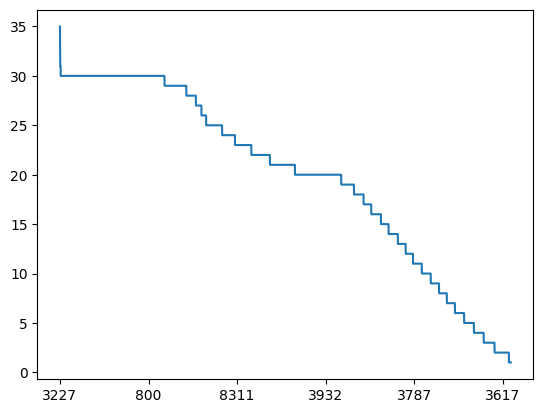

In [45]:
pd.DataFrame([list(_)[0].split() for _ in df_id_all.values], columns=['f_name', 'id'])['id'].value_counts().plot()

From above figure, if the horizontal segment of the plot is longer, the height (y value, which is integer) is more common.

I'm gonna drop less common ids because we need to split them into two subsets and put them in a face recognition model

In [48]:
df_id_all=pd.DataFrame([list(_)[0].split() for _ in df_id_all.values], columns=['f_name', 'id'])

In [57]:
#drop files used for training AttGAN. (refer to AttGAN-Python/train.py)
df_id_test=df_id_all[182000:]
df_id_test[:5]

,f_name,id
182000,182001.jpg,1210
182001,182002.jpg,465
182002,182003.jpg,4072
182003,182004.jpg,2810
182004,182005.jpg,2658


In [247]:
n_samples=30 #this will determine the amount of samples in each identity subsets. Any identities having less amount of images will be dropped.
# df_id_test.loc[]
# df_id_test['id']
val_cnts=df_id_test['id'].value_counts()
idx=val_cnts.loc[(val_cnts>=n_samples)].index

In [248]:
len(idx)

261

In [249]:
df_id_test['id'].isin(idx)

182000    False
182001    False
182002    False
182003    False
182004    False
          ...  
202594     True
202595     True
202596    False
202597     True
202598    False
Name: id, Length: 20599, dtype: bool

In [250]:
df_id_test_picked=df_id_test.loc[df_id_test['id'].isin(idx)]

In [251]:
seed=0
samples=[]
source_size=0.5 #source reference split
n_src=int(source_size*n_samples)
n_ref=n_samples-n_src
assert n_src>0 #and n_ref>0
src_samples=[]
ref_samples=[]
for id in idx:
    _samples=df_id_test_picked.loc[df_id_test_picked['id']==id].sample(n=n_samples, random_state=seed)
    src_sample, ref_sample=_samples[:n_src], _samples[n_src:]
    src_samples.append(src_sample)
    ref_samples.append(ref_sample)
df_id_test_samples_src, df_id_test_samples_ref=pd.concat(src_samples, axis=0).sort_index(), pd.concat(ref_samples, axis=0).sort_index()

In [252]:
print(len(df_id_test_samples_src))
df_id_test_samples_src['id'].value_counts()

3915


9010    15
7358    15
5966    15
5256    15
5354    15
        ..
8786    15
4973    15
8912    15
4992    15
8717    15
Name: id, Length: 261, dtype: int64

In [253]:
print(len(df_id_test_samples_ref))
df_id_test_samples_ref['id'].value_counts()

3915


7760    15
8786    15
8496    15
7883    15
9194    15
        ..
5987    15
6454    15
4996    15
5159    15
5585    15
Name: id, Length: 261, dtype: int64

In [254]:
dir=r'C:\GitHub\Smart-Education-data\data\celeba_sampled'
# df_id_test_samples_src.to_csv(ospj(dir, f'id_test_{n_src}_source.csv'))
# df_id_test_samples_ref.to_csv(ospj(dir, f'id_test_{n_ref}_reference.csv'))

mergeing df_id_XXX with other headers

In [350]:
import pandas as pd
import numpy as np
from os.path import join as ospj
n_src, n_ref=1, 1
dir_csv=r'C:\GitHub\Smart-Education-data\data\celeba_sampled'
df_id_test_samples_src=pd.read_csv(ospj(dir_csv, f'id_test_{n_src}_source.csv'), index_col=0)
df_id_test_samples_ref=pd.read_csv(ospj(dir_csv, f'id_test_{n_ref}_reference.csv'), index_col=0)

In [351]:
dir_anno=r'C:\GitHub\Smart-Education-data\data\Anno'

In [352]:
df_attr=pd.read_csv(ospj(dir_anno, 'list_attr_celeba.txt'), header=None)
cols=df_attr.iloc[1, 0].split()
_attrs=[_.split() for _ in df_attr.iloc[2:, 0]]
# list_attrs=[cols]+_attrs
df_attr=pd.DataFrame(_attrs, columns=['f_name']+cols)
df_attr

,f_name,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
0,000001.jpg,-1,1,1,-1,-1,-1,-1,-1,-1,...,-1,1,1,-1,1,-1,1,-1,-1,1
1,000002.jpg,-1,-1,-1,1,-1,-1,-1,1,-1,...,-1,1,-1,-1,-1,-1,-1,-1,-1,1
2,000003.jpg,-1,-1,-1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,1,-1,-1,-1,-1,-1,1
3,000004.jpg,-1,-1,1,-1,-1,-1,-1,-1,-1,...,-1,-1,1,-1,1,-1,1,1,-1,1
4,000005.jpg,-1,1,1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,-1,-1,-1,1,-1,-1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202594,202595.jpg,-1,-1,1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,-1,-1,-1,1,-1,-1,1
202595,202596.jpg,-1,-1,-1,-1,-1,1,1,-1,-1,...,-1,1,1,-1,-1,-1,-1,-1,-1,1
202596,202597.jpg,-1,-1,-1,-1,-1,-1,-1,-1,1,...,-1,1,-1,-1,-1,-1,-1,-1,-1,1
202597,202598.jpg,-1,1,1,-1,-1,-1,1,-1,1,...,-1,1,-1,1,1,-1,1,-1,-1,1


In [353]:
df_meta_src=df_attr.merge(df_id_test_samples_src)
dir_celeba=r'C:\GitHub\Smart-Education-data\data\celeba'
df_meta_src['path']=dir_celeba+'/'+df_meta_src['f_name']
# df_meta_src[['f_name', 'path']]

df_meta_ref=df_attr.merge(df_id_test_samples_ref)
dir_celeba=r'C:\GitHub\Smart-Education-data\data\celeba'
df_meta_ref['path']=dir_celeba+'/'+df_meta_ref['f_name']
# df_meta_ref[['f_name', 'path']]

In [354]:
dir_meta=r'C:\GitHub\Smart-Education-data\data\celeba_sampled'
# df_meta_src.to_csv(ospj(dir_meta, f'meta_s{n_src}_src.csv'))
# df_meta_ref.to_csv(ospj(dir_meta, f'meta_s{n_ref}_ref.csv'))

copying files

In [370]:
import shutil
from os import mkdir
from os.path import exists as osex
from os.path import join as ospj

In [371]:
n_src, n_ref=15, 15

In [372]:
dir_meta=r'C:\GitHub\Smart-Education-data\data\celeba_sampled'
df_meta_src=pd.read_csv(ospj(dir_meta, f'meta_s{n_src}_src.csv'))
df_meta_ref=pd.read_csv(ospj(dir_meta, f'meta_s{n_ref}_ref.csv'))

dir_source=ospj(r'C:\GitHub\Smart-Education-data\data\celeba_sampled', f'src_s{n_src}')
dir_reference=ospj(r'C:\GitHub\Smart-Education-data\data\celeba_sampled', f'ref_s{n_ref}')

if not osex(dir_source):
    mkdir(dir_source)
if not osex(dir_reference):
    mkdir(dir_reference)
for source_path in df_meta_src['path']:
    f_name=source_path.replace('\\', '/').split('/')[-1]
    # shutil.copy2(source_path, ospj(dir_source, f_name))
for reference_path in df_meta_ref['path']:
    f_name=reference_path.replace('\\', '/').split('/')[-1]
    # shutil.copy2(reference_path, ospj(dir_reference, f_name))

preparing attr.txt from meta data

In [5]:
import pandas as pd
import numpy as np
from os.path import join as ospj

In [28]:
n_src, n_ref=15, 15
list_attr=['Bald', 'Bangs', 'Black_Hair', 'Blond_Hair', 'Brown_Hair', 'Bushy_Eyebrows', 'Eyeglasses', 'Male', 'Mouth_Slightly_Open', 'Mustache', 'No_Beard', 'Pale_Skin', 'Young']
df_meta_src=pd.read_csv(ospj(r'C:\GitHub\Smart-Education-data\data\celeba_sampled', f'meta_s{n_src}_src.csv'), index_col=0)
data=[' '.join(line)+'\n' for line in df_meta_src.iloc[:, :-2].loc[:, ['f_name']+list_attr].astype(str).values]
# cols=[' '.join(df_meta_src.iloc[:, 1:-2].columns)+'\n']
cols=[' '.join(list_attr)+'\n']
length=str(len(data))
list_text=[length+'\n']+cols+data
dir_to_save_list_attr=r'C:\GitHub\Smart-Education-data\data\celeba_sampled'
with open(ospj(dir_to_save_list_attr, f'list_attr_s{n_src}_src.txt'), 'w') as f:
    f.writelines(list_text)

df_meta_ref=pd.read_csv(ospj(r'C:\GitHub\Smart-Education-data\data\celeba_sampled', f'meta_s{n_ref}_ref.csv'), index_col=0)
data=[' '.join(line)+'\n' for line in df_meta_ref.iloc[:, :-2].loc[:, ['f_name']+list_attr].astype(str).values]
# cols=[' '.join(df_meta_ref.iloc[:, 1:-2].columns)+'\n']
cols=[' '.join(list_attr)+'\n']
length=str(len(data))
list_text=[length+'\n']+cols+data
dir_to_save_list_attr=r'C:\GitHub\Smart-Education-data\data\celeba_sampled'
with open(ospj(dir_to_save_list_attr, f'list_attr_s{n_ref}_ref.txt'), 'w') as f:
    f.writelines(list_text)

In [6]:
# import glob
# import pandas as pd
# import numpy as np
# from os.path import join as ospj
# source_dir=r'C:\GitHub\Smart-Education-data\data\celeba_sampled\src_s1_low_cloak_fawkes' 
# target_dir=r'C:\GitHub\Smart-Education-data\data\celeba_sampled\ref_s1'
# result_dir=r'C:\GitHub\Smart-Education-data\data\celeba_sampled\aws_result'

# list_source_files=glob.glob(ospj(source_dir, '*'))
# list_target_files=glob.glob(ospj(target_dir, '*'))

# print(list_source_files[:3])
# #sampling
# np.random.seed(0)
# list_source_files=list(pd.Series(list_source_files, dtype='object').sample(n=10))
# list_target_files=list(pd.Series(list_target_files, dtype='object').sample(n=10))

# print(list_source_files)
# print(list_target_files)

['C:\\GitHub\\Smart-Education-data\\data\\celeba_sampled\\src_s1_low_cloak_fawkes\\182064_cloaked.png', 'C:\\GitHub\\Smart-Education-data\\data\\celeba_sampled\\src_s1_low_cloak_fawkes\\182066_cloaked.png', 'C:\\GitHub\\Smart-Education-data\\data\\celeba_sampled\\src_s1_low_cloak_fawkes\\182102_cloaked.png']
['C:\\GitHub\\Smart-Education-data\\data\\celeba_sampled\\src_s1_low_cloak_fawkes\\188157_cloaked.png', 'C:\\GitHub\\Smart-Education-data\\data\\celeba_sampled\\src_s1_low_cloak_fawkes\\183818_cloaked.png', 'C:\\GitHub\\Smart-Education-data\\data\\celeba_sampled\\src_s1_low_cloak_fawkes\\190521_cloaked.png', 'C:\\GitHub\\Smart-Education-data\\data\\celeba_sampled\\src_s1_low_cloak_fawkes\\194490_cloaked.png', 'C:\\GitHub\\Smart-Education-data\\data\\celeba_sampled\\src_s1_low_cloak_fawkes\\186678_cloaked.png', 'C:\\GitHub\\Smart-Education-data\\data\\celeba_sampled\\src_s1_low_cloak_fawkes\\191687_cloaked.png', 'C:\\GitHub\\Smart-Education-data\\data\\celeba_sampled\\src_s1_low_clo

In [115]:
n_src, n_ref=15, 15

#fawkes cloaked
source_dir=ospj(r'C:\GitHub\Smart-Education-data\data\celeba_sampled', f'src_s{n_src}_low_cloak_fawkes' )
target_dir=ospj(r'C:\GitHub\Smart-Education-data\data\celeba_sampled', f'ref_s{n_ref}')
result_dir=r'C:\GitHub\Smart-Education-data\data\celeba_sampled\aws_result'

# list_source_files=glob.glob(ospj(source_dir, '*'))
# list_target_files=glob.glob(ospj(target_dir, '*'))
df_src_id_f_name=pd.read_csv(ospj(r'C:\GitHub\Smart-Education-data\data\celeba_cropped_178x178\comparison', f'src_s{n_src}_id_f_name.csv'))
df_ref_id_f_name=pd.read_csv(ospj(r'C:\GitHub\Smart-Education-data\data\celeba_cropped_178x178\comparison', f'ref_s{n_ref}_id_f_name.csv'))

src_f_names=df_src_id_f_name['f_name'].values.reshape(-1, n_src)
ref_f_names=df_ref_id_f_name['f_name'].values.reshape(-1, n_ref)

print(src_f_names.shape)

#(1136, 1) => 100 => 100
#(954, 2) => 100 => 100*2*2 => 400
#(856, 4) => 100 => 100*4*4 => 1600 
#(706, 8) => 100 => 100*8*8 => 6400
#(616, 10) => 100 => 100*10*10 => 10000
#(261, 15) => 100 => 100*15*15 => 22500 comparisons
pass

(261, 15)


analyze Anno/identity_CelebA.txt

In [132]:
with open('C:\GitHub\Smart-Education-data\data\Anno\identity_CelebA.txt') as f:
    lines=f.readlines()
new_lines=[]
for line in lines:
    new_lines.append(line.split())
df_id=pd.DataFrame(new_lines, columns=['f_name', 'id'])
# np.sum((df_id.loc[182000:, 'id'].value_counts()==1).values)
# len(df_id[182000:])
# len(df_id)

fixing redundacy problem of celeba

In [98]:
import pandas as pd
import numpy as np
from os.path import join as ospj

In [99]:
n_src, n_ref=(15,15)

In [100]:
path=r'C:\GitHub\Smart-Education-data\data\celeba_sampled'
df_src=pd.read_csv(ospj(path, f'meta_s{n_src}_src.csv'), index_col=0)
df_ref=pd.read_csv(ospj(path, f'meta_s{n_ref}_ref.csv'), index_col=0)

In [101]:
df_src_sorted=df_src.sort_values(by='id').loc[:, ['id', 'f_name']].reset_index(drop=True)
df_ref_sorted=df_ref.sort_values(by='id').loc[:, ['id', 'f_name']].reset_index(drop=True)
(df_ref_sorted['id'].values==df_src_sorted['id'].values).all()

True

In [102]:
np.array([True, True, False]).all()

False

In [103]:
from matplotlib import pyplot as plt
dir_src=ospj(r'C:\GitHub\Smart-Education-data\data\celeba_cropped_178x178', f'src_s{n_src}')
dir_ref=ospj(r'C:\GitHub\Smart-Education-data\data\celeba_cropped_178x178', f'ref_s{n_ref}')

In [104]:
# list(zip(df_src_sorted['f_name'], df_ref_sorted['f_name'])) #left and right must be different
# list(zip(df_src_sorted['id'], df_ref_sorted['id'])) #left and right must be the same

In [105]:
# N=len(df_src_sorted['f_name'])
# from PIL import Image
# # plt.figure(figsize=(5, 500))
# start, end=10, 20
# for i, (f_name_src, f_name_ref) in enumerate(zip(df_src_sorted.loc[start:end, 'f_name'], df_ref_sorted.loc[start:end, 'f_name'])):
#     plt.figure()
#     img_s=plt.imread(ospj(dir_src, f_name_src))
#     # print(i*2+1, i*2+2)
#     # plt.subplot(N, 2, i*2+1)
#     plt.subplot(1, 2, 1)
#     plt.imshow(img_s)
#     img_r=plt.imread(ospj(dir_ref, f_name_ref))
#     # plt.subplot(N, 2, i*2+2)
#     plt.subplot(1, 2, 2)
#     plt.imshow(img_r)
#     # img_s=Image.open(ospj(dir_src, f_name_src))
#     # img_r=Image.open(ospj(dir_ref, f_name_ref))
#     # img_s.show()
#     # img_r.show()
#     # _input=input('proceed? [y/n]')
#     # if _input=='y':
#     #     continue
#     # else:
#     #     break

In [106]:
# def get_concat_h(im1, im2):
#     dst = Image.new('RGB', (im1.width + im2.width, im1.height))
#     dst.paste(im1, (0, 0))
#     dst.paste(im2, (im1.width, 0))
#     return dst

# def get_concat_v(im1, im2):
#     dst = Image.new('RGB', (im1.width, im1.height + im2.height))
#     dst.paste(im1, (0, 0))
#     dst.paste(im2, (0, im1.height))
#     return dst

In [107]:
# N=len(df_src_sorted['f_name'])
# from PIL import Image
# # start, end=10, 20
# # for i, (f_name_src, f_name_ref) in enumerate(zip(df_src_sorted.loc[start:end, 'f_name'], df_ref_sorted.loc[start:end, 'f_name'])):
# for i, (f_name_src, f_name_ref) in enumerate(zip(df_src_sorted.loc[:, 'f_name'], df_ref_sorted.loc[:, 'f_name'])):
#     img_s=Image.open(ospj(dir_src, f_name_src))
#     img_r=Image.open(ospj(dir_ref, f_name_ref))
#     img_sr=get_concat_h(img_s, img_r)
#     if i==0:
#         img_concat=img_sr
#     else:
#         img_concat=get_concat_v(img_concat, img_sr)
#     # img_s.show()
#     # img_r.show()
#     # _input=input('proceed? [y/n]')
#     # if _input=='y':
#     #     continue
#     # else:
#     #     break
# img_concat.show()

In [108]:
# img_concat.save(r'C:\GitHub\Smart-Education-data\data\celeba_cropped_178x178\comparison\img_concat.png')

anyway comparing all the images manually makes no sense

In [109]:
df_src_sorted.to_csv(ospj(r'C:\GitHub\Smart-Education-data\data\celeba_cropped_178x178\comparison', f'src_s{n_src}_id_f_name.csv'))
df_ref_sorted.to_csv(ospj(r'C:\GitHub\Smart-Education-data\data\celeba_cropped_178x178\comparison', f'ref_s{n_ref}_id_f_name.csv'))

In [138]:
# n_src, n_ref=1,1

# #fawkes cloaked
# source_dir=ospj(r'C:\GitHub\Smart-Education-data\data\celeba_sampled', f'src_s{n_src}_low_cloak_fawkes' )
# target_dir=ospj(r'C:\GitHub\Smart-Education-data\data\celeba_sampled', f'ref_s{n_ref}')
# result_dir=r'C:\GitHub\Smart-Education-data\data\celeba_sampled\aws_result'
# result_f_name=f'fawkes_s{n_src}_similarity.csv'

# # source_dir=ospj(r'C:\GitHub\Smart-Education-data\data\celeba_sampled', f'src_s{n_src}_low_cloak_fawkes' )
# # target_dir=ospj(r'C:\GitHub\Smart-Education-data\data\celeba_sampled', f'ref_s{n_ref}')
# # result_dir=r'C:\GitHub\Smart-Education-data\data\celeba_sampled\aws_result'

# # list_source_files=glob.glob(ospj(source_dir, '*'))
# # list_target_files=glob.glob(ospj(target_dir, '*'))
# df_src_id_f_name=pd.read_csv(ospj(r'C:\GitHub\Smart-Education-data\data\celeba_cropped_178x178\comparison', f'src_s{n_src}_id_f_name.csv'), index_col=0)
# df_ref_id_f_name=pd.read_csv(ospj(r'C:\GitHub\Smart-Education-data\data\celeba_cropped_178x178\comparison', f'ref_s{n_ref}_id_f_name.csv'), index_col=0)

# # src_mat_f_names=df_src_id_f_name['f_name'].values.reshape(-1, n_src)
# # ref_mat_f_names=df_ref_id_f_name['f_name'].values.reshape(-1, n_ref)

# ### Warning: this supports n_src, n_ref = 1,1 only for now
# assert (n_src, n_ref) == (1, 1)

# #sampling
# N=100
# np.random.seed(0)
# # list_source_files=list(pd.Series(list_source_files, dtype='object').sample(n=N))
# # list_target_files=list(pd.Series(list_target_files, dtype='object').sample(n=N))

# df_src_id_f_name=df_src_id_f_name.sample(n=N)
# df_ref_id_f_name=df_ref_id_f_name.iloc[df_src_id_f_name.index]